# Caroline Barte
# DSC 630 Final Project

## Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [2]:
df = pd.read_csv('NHL 2004-2018 Player Data.csv', encoding='ISO-8859-1')

## Initial Cleaning

In [3]:
df.columns

Index(['Rk', 'Player', 'Age', 'Pos', 'Tm', 'GP', 'G', 'A', 'PTS', 'plusminus',
       'PIM', 'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S',
       'S_percent', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO_percent',
       'HART', 'Votes', 'Season'],
      dtype='object')

In [4]:
# Removing irrellevant columns
df.drop(['Rk', 'Player', 'Tm', 'Season'], axis=1, inplace=True)

In [5]:
# Ensure values are numeric
numeric_cols = ['Age', 'GP', 'G', 'A', 'PTS', 'plusminus', 'PIM', 'PS', 'EV', 
                'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S_percent', 
                'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO_percent', 'Votes']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [6]:
# Drop NA values
df.dropna(inplace=True)

In [7]:
# Ensure the 'HART' variable is binary
df['HART'] = df['HART'].astype(int)

In [8]:
# Encode player position
df = pd.get_dummies(df, columns=['Pos'], drop_first=True)

## Initial Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X = df.drop(columns=['HART', 'Votes'])
y = df['Votes'] 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2568.87
R-squared: 0.08


In [17]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))

       Feature  Coefficient
14        SH.1    10.990335
12        EV.1    10.442862
13        PP.1    10.379193
7           PS     8.264768
27    Pos_LW/C     6.167360
30   Pos_RW/LW     4.015043
2            G     3.106735
31       Pos_W     2.052570
24    Pos_C/LW     2.024287
28   Pos_LW/RW     1.923769
8           EV     1.273221
10          SH     1.210960
9           PP     0.622555
18        ATOI     0.355885
11          GW     0.248864
25       Pos_D     0.078741
1           GP     0.068506
20         HIT     0.052593
6          PIM     0.045487
21         FOW     0.038622
0          Age     0.019643
19         BLK     0.009636
22         FOL    -0.019587
17         TOI    -0.039286
23  FO_percent    -0.050408
15           S    -0.075368
29      Pos_RW    -0.238162
5    plusminus    -0.313160
16   S_percent    -0.407019
26      Pos_LW    -0.737825
4          PTS    -3.492368
3            A    -6.599104


In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 11.80
Mean Squared Error (MSE): 2568.87
Root Mean Squared Error (RMSE): 50.68
R-squared (R²): 0.08


## Second Model

In [19]:
correlation_matrix = df.corr()

In [20]:
votes_correlation = correlation_matrix['Votes'].sort_values(ascending=False)
print(votes_correlation)

Votes         1.000000
HART          0.751704
PS            0.213029
PTS           0.211126
G             0.210478
EV            0.202714
A             0.192387
GW            0.190637
PP            0.184976
PP.1          0.178551
EV.1          0.177183
S             0.159250
plusminus     0.122008
FOL           0.110906
FOW           0.106190
TOI           0.082963
ATOI          0.075372
GP            0.056522
S_percent     0.055573
SH            0.047575
FO_percent    0.036365
SH.1          0.028726
PIM           0.026971
HIT           0.026245
BLK           0.005435
Pos_LW        0.002936
Pos_RW        0.002325
Pos_LW/C     -0.000535
Pos_RW/LW    -0.000535
Pos_W        -0.000535
Pos_LW/RW    -0.000757
Pos_C/LW     -0.000927
Age          -0.011691
Pos_D        -0.039485
Name: Votes, dtype: float64


In [21]:
low_correlation_features = [
    'plusminus', 'FOL','FOW','TOI', 'ATOI', 'GP', 'S_percent', 'SH', 'FO_percent', 
    'SH.1', 'PIM', 'HIT', 'BLK', 'Pos_LW', 'Pos_RW', 
    'Pos_LW/C', 'Pos_RW/LW', 'Pos_W', 'Pos_LW/RW', 
    'Pos_C/LW', 'Age', 'Pos_D'
]

df.drop(columns=low_correlation_features, inplace=True)

In [22]:
X = df.drop(columns=['HART', 'Votes'])  # Keep 'HART' if needed, but here we focus on 'Votes'
y = df['Votes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))

Mean Absolute Error (MAE): 10.88
Mean Squared Error (MSE): 2633.59
Root Mean Squared Error (RMSE): 51.32
R-squared (R²): 0.05
  Feature  Coefficient
3      PS     2.983771
8    PP.1     1.867983
7    EV.1     1.438407
4      EV     1.204970
5      PP     0.926367
0       G     0.732930
6      GW     0.584383
9       S    -0.205877
2     PTS    -0.280666
1       A    -1.013596


## Visualizations

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

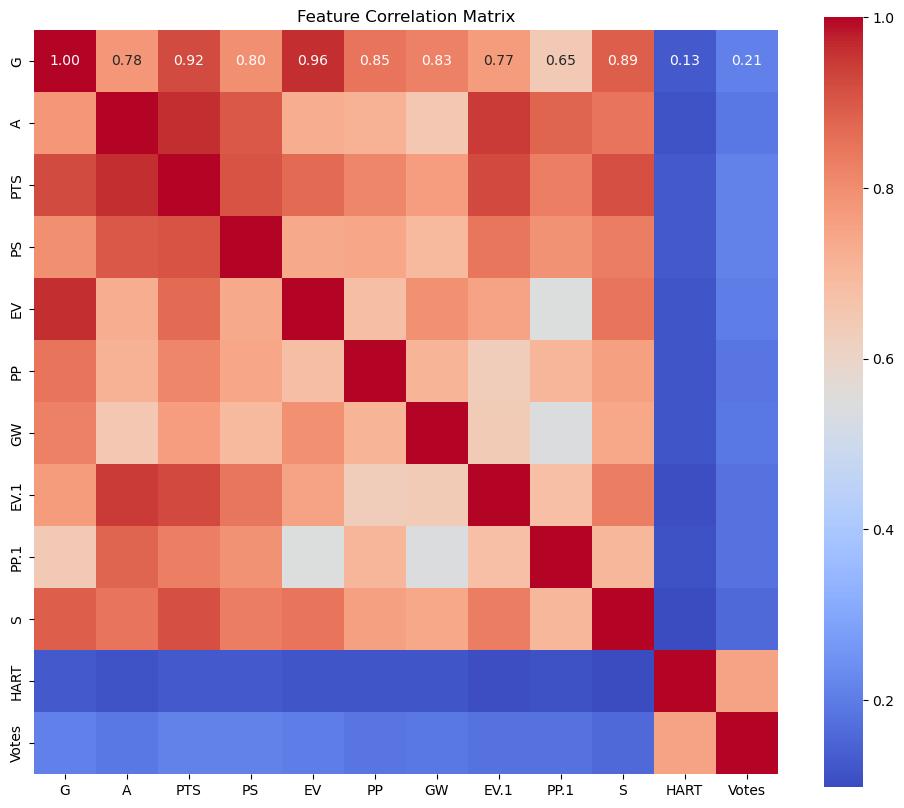

In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

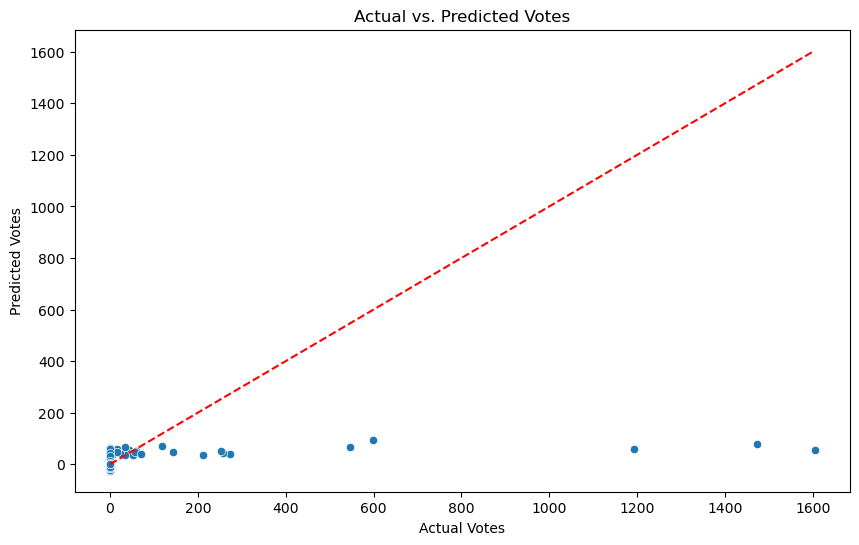

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Votes")
plt.ylabel("Predicted Votes")
plt.title("Actual vs. Predicted Votes")
plt.show()

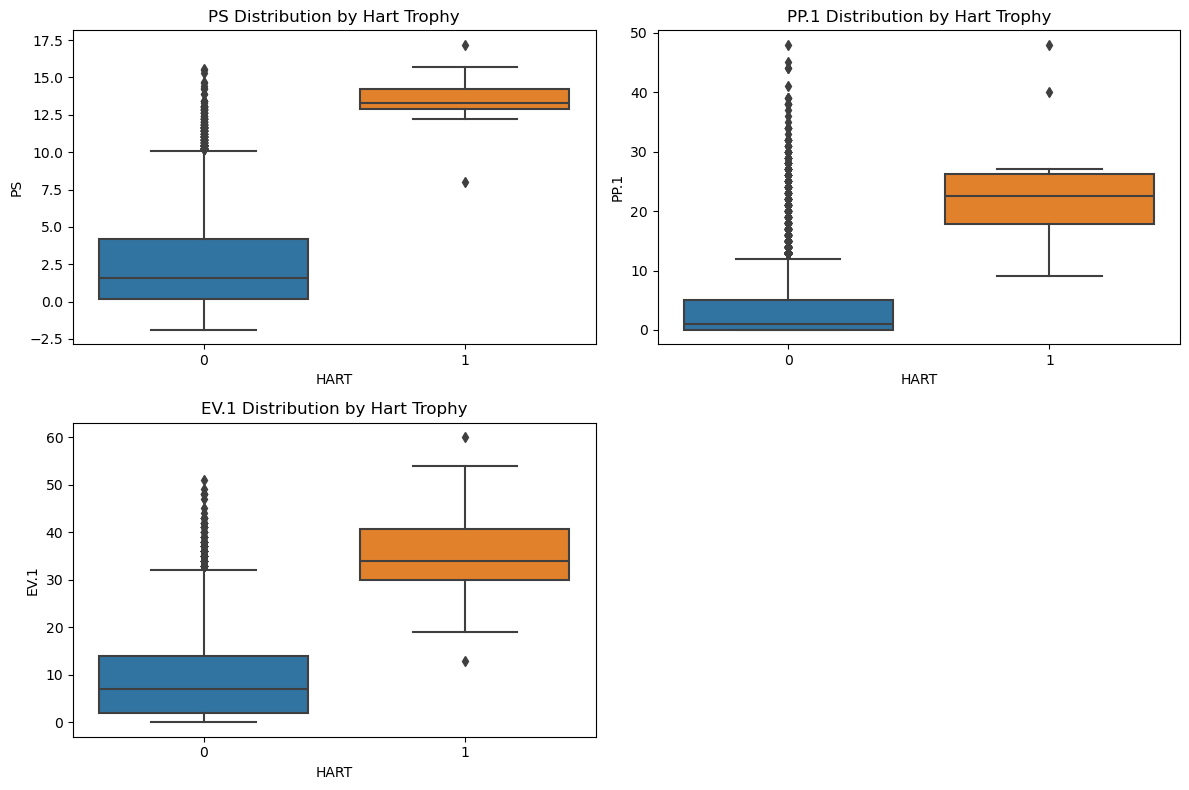

In [27]:
key_features = ['PS', 'PP.1', 'EV.1']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='HART', y=feature, data=df)
    plt.title(f"{feature} Distribution by Hart Trophy")
plt.tight_layout()
plt.show()